In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from src.LoadBeatles import create_training_data
import matplotlib.pyplot as plt
import numpy as np

2022-09-01 17:53:40.984051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nags205/root/build/lib
2022-09-01 17:53:40.984105: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Fit by some models, input data = 56*56

In [2]:
(train_images, train_labels), (test_images, test_labels) = create_training_data(IMG_SIZE = 56)

## model1

In [3]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 3)))
model1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))


model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(2,activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        102464    
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 64)        102464    
                                                        

2022-09-01 17:55:46.220423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nags205/.local/lib/python3.8/site-packages/cv2/../../lib64:/home/nags205/root/build/lib
2022-09-01 17:55:46.220463: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-01 17:55:46.220485: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (NagS205): /proc/driver/nvidia/version does not exist
2022-09-01 17:55:46.220715: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(train_images, train_labels, epochs=5)

2022-09-01 17:55:46.335453: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 304066560 exceeds 10% of free system memory.


Epoch 1/5
253/253 [==============================] - 58s 227ms/step - loss: 1.4144 - accuracy: 0.5673
Epoch 2/5
253/253 [==============================] - 66s 259ms/step - loss: 0.6393 - accuracy: 0.6308
Epoch 3/5
253/253 [==============================] - 80s 318ms/step - loss: 0.5928 - accuracy: 0.6953
Epoch 4/5
253/253 [==============================] - 67s 264ms/step - loss: 0.4746 - accuracy: 0.7785
Epoch 5/5
253/253 [==============================] - 77s 304ms/step - loss: 0.3650 - accuracy: 0.8363


In [14]:
model1.fit(train_images, train_labels, epochs=5)

Epoch 1/5


2022-09-01 18:04:21.627747: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 304066560 exceeds 10% of free system memory.


253/253 [==============================] - 65s 257ms/step - loss: 0.2704 - accuracy: 0.8873
Epoch 2/5
253/253 [==============================] - 79s 313ms/step - loss: 0.2132 - accuracy: 0.9160
Epoch 3/5
253/253 [==============================] - 72s 287ms/step - loss: 0.1671 - accuracy: 0.9366
Epoch 4/5
253/253 [==============================] - 67s 265ms/step - loss: 0.1523 - accuracy: 0.9434
Epoch 5/5
253/253 [==============================] - 75s 296ms/step - loss: 0.1396 - accuracy: 0.9465


In [15]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)

64/64 [==============================] - 4s 59ms/step - loss: 1.3339 - accuracy: 0.6723


# evaluation of models

In [10]:
class_names = ['rhinoceros', 'stag']
class_num = len(class_names)

In [11]:
class_num

2

In [12]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('uint8'), cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'
        
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(class_num))
    plt.yticks([])
    thisplot = plt.bar(range(class_num), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

## model 1

In [8]:
probability_model1 = tf.keras.Sequential([model1,
                                         tf.keras.layers.Softmax()])
predictions1 = probability_model1.predict(test_images)

64/64 [==============================] - 3s 46ms/step


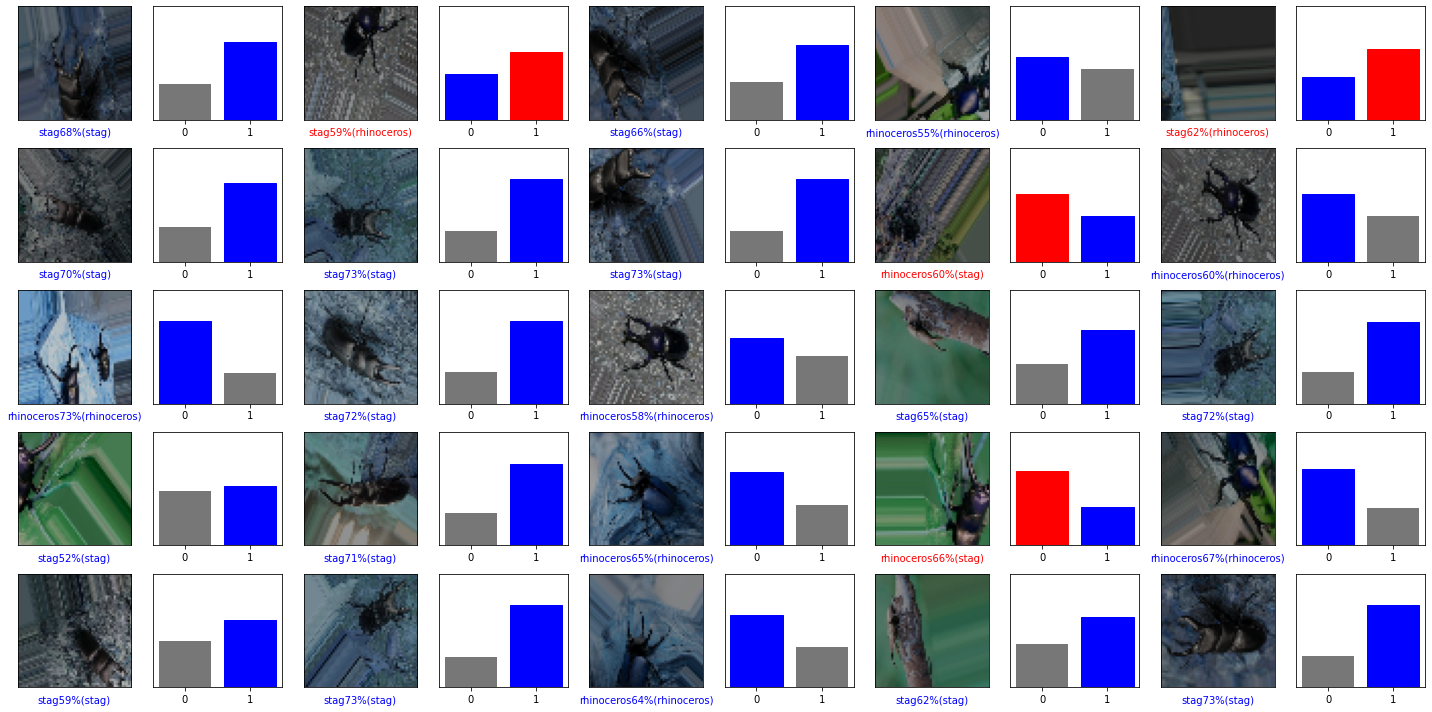

In [13]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

batch_mask = np.random.choice(len(test_images), num_images)
img_batch = test_images[batch_mask]
label_batch = test_labels[batch_mask]
predictions_batch = predictions1[batch_mask]

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_batch[i], label_batch, img_batch)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_batch[i], label_batch)
plt.tight_layout()
plt.show()